In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

C:\Users\HO NGUYEN KY TRUNG\AppData\Local\Temp\ipykernel_13112\2692862123.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_path = 'survey_results.csv'
data_raw_df= pd.read_csv(data_path)
data_raw_df.describe()

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)",Please give us any design ideas to make the car uniquely Singaporean.
count,50,50,50,50,49,50,49,50,50,50,50,50,17
unique,4,3,3,3,37,3,23,16,5,3,4,2,17
top,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels,Dashboard,500-1000,Only with professional help,500-1000,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer
freq,41,32,36,38,5,37,8,11,19,26,21,33,1


In [3]:
for column_name in data_raw_df.columns:
    print(column_name)
    print(data_raw_df[column_name].unique())
    print("")

Which age group do you belong to?
['20-30' '51-60' '41-50' '31-40']

What is your gender?
['Male' 'Female' 'Prefer not to say']

Which category do you currently belong to?
['Do not own a car, but planning to purchase in future'
 'Own more than one car' 'Own a car']

Which of the following best describes you?
['Single' 'Married with children' 'Married with no children']

Which of these factors are important to you when deciding which car to purchase?
['Price;Functionality;Size;Customisable options'
 'Price;Brand name;Aesthetics;Technological features;Functionality;Size;Sustainability/environment considerations'
 'Aesthetics;Functionality;Customisable options'
 'Price;Brand name;Aesthetics;Technological features;Functionality;Size;Customisable options;Sustainability/environment considerations'
 'Price;Brand name;Aesthetics;Technological features;Functionality'
 'Price;Brand name;Aesthetics;Technological features;Functionality;Size'
 'Price;Technological features;Functionality'
 'Price;Br

In [4]:
# Data Cleaning
# To change the keys (column names) of multiple columns:
data_mod_df = data_raw_df.copy()
data_mod_df.rename(columns={'Which age group do you belong to?': 'age_group', 
                            'What is your gender?': 'gender', 
                            "Which category do you currently belong to?": "car",
                            "Which of the following best describes you?": "mariage",
                            "Which of these factors are important to you when deciding which car to purchase?": "purchase_factors",
                            "How likely are you to opt for customised vehicle if there were no extra charges? ": "customisation",
                            "Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ": "ex_components_custom",
                            "Which of the following interior components would you choose to customise (texture, layout, size, etc)? ": "in_components_custom",
                            "How much are you willing to spend on car customisation if surcharges are applicable?": "custom_spend",
                            "Are you interested in designing your own components to personalise your car? ": "custom_interest",
                            "How much are you willing to pay for the personalised design? ": "personalised_design_spend",
                            "Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)": "des_exp",
                            "Please give us any design ideas to make the car uniquely Singaporean.": "des_ideas"
                            }, inplace=True)
# Replace '100-500' with 'under 500' in the 'custom_spend' column
data_mod_df['custom_spend']=data_mod_df['custom_spend'].replace('100-500', 'under 500')

data_mod_df.head()


,age_group,gender,car,mariage,purchase_factors,customisation,ex_components_custom,in_components_custom,custom_spend,custom_interest,personalised_design_spend,des_exp,des_ideas
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,under 500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",NaN
1,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own",NaN
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Grilles;Headlights;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,under 500,Yes,under 500,"No, I would need a designer to model my sketch",NaN
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Grilles;Headlights;Bumpers,Steering wheel;Centre compartment,over 1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch",Sg flag/ colour related car paint


In [6]:
def encode(column_name, data_frame):
    print("_"*120)
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Create a new column name for the encoded values
    encoded_column_name = column_name+"_encoded"

    # Apply label encoding to the specified column
    data_frame[encoded_column_name] = label_encoder.fit_transform(data_frame[column_name])

    # Create a legend to show the original values and their corresponding encoded values
    legend = data_frame[[column_name, encoded_column_name]].copy()
    legend = legend.drop_duplicates().reset_index(drop=True)
    print(legend)

    # Drop the original column from the DataFrame
    data_frame.drop(column_name, axis=1, inplace=True)


In [ ]:
encode('age_group',data_mod_df)
encode('gender',data_mod_df)
encode('car',data_mod_df)
encode('mariage',data_mod_df)
encode('customisation',data_mod_df)
encode('custom_spend',data_mod_df)
encode('custom_interest',data_mod_df)
encode('personalised_design_spend',data_mod_df)
encode('des_exp',data_mod_df)

#### **Car owner ship:** 
    'Do not own a car, but planning to purchase in future': 0,
    'Own a car': 1,
    'Own more than one car': 2
#### **Do you have any 3D design experience that would help with the design process?**
    'No, I would need a designer to model my sketch': 0,
    'Yes, I can design on my own': 1
#### **Gender:**
    Male: M
    Female: F
    Prefer not to say: N/A

In [9]:
encoded_df = data_mod_df.copy()
encoded_df['car'] = data_mod_df['car'].replace({
    'Do not own a car, but planning to purchase in future': 0,
    'Own a car': 1,
    'Own more than one car': 2
})
encoded_df['des_exp'] = data_mod_df['des_exp'].replace({
    'No, I would need a designer to model my sketch': 0,
    'Yes, I can design on my own': 1
})
encoded_df['gender'] = data_mod_df['gender'].replace({
    'Male': 1,
    'Female': 2,
    'Prefer not to say': 0,
})
encoded_df['age_group'] = data_mod_df['age_group'].replace({
    '20-30': 0,
    '31-40': 1,
    '41-50': 2,
    '51-60': 3,
})
encoded_df['mariage'] = data_mod_df['mariage'].replace({
    'Single': 0,
    'Married with no children': 1,
    'Married with children': 2,
})
encoded_df['customisation'] = data_mod_df['customisation'].replace({
    'Not likely': 0,
    'Likely': 1,
    'Very likely': 2,
})
encoded_df['custom_spend'] = data_mod_df['custom_spend'].replace({
    '0': 0,
    'under 500': 1,
    '500-1000': 2,
    'over 1000': 3,
})
encoded_df['custom_interest'] = data_mod_df['custom_interest'].replace({
    'No': 0,
    'Yes': 1,
    'Only with professional help': 2,
})
encoded_df['personalised_design_spend'] = data_mod_df['personalised_design_spend'].replace({
    '0': 0,
    'under 500': 1,
    '500-1000': 2,
    'over 1000': 3,
})
encoded_df.head()

C:\Users\HO NGUYEN KY TRUNG\AppData\Local\Temp\ipykernel_13112\2091522786.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['car'] = data_mod_df['car'].replace({
C:\Users\HO NGUYEN KY TRUNG\AppData\Local\Temp\ipykernel_13112\2091522786.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['des_exp'] = data_mod_df['des_exp'].replace({
C:\Users\HO NGUYEN KY TRUNG\AppData\Local\Temp\ipykernel_13112\2091522786.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future v

,age_group,gender,car,mariage,purchase_factors,customisation,ex_components_custom,in_components_custom,custom_spend,custom_interest,personalised_design_spend,des_exp,des_ideas
0,0,0,0,0,Price;Functionality;Size;Customisable options,2,Grilles,Centre compartment,1,2,2,0,NaN
1,0,1,0,0,Price;Brand name;Aesthetics;Technological feat...,1,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,1,2,1,0,wheels that look like the singapore flyer
2,0,0,0,0,Aesthetics;Functionality;Customisable options,2,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,2,1,2,1,NaN
3,0,1,0,0,Price;Brand name;Aesthetics;Technological feat...,2,Wheels;Grilles;Headlights;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,1,1,1,0,NaN
4,0,0,0,0,Price;Brand name;Aesthetics;Technological feat...,2,Wheels;Grilles;Headlights;Bumpers,Steering wheel;Centre compartment,3,2,3,0,Sg flag/ colour related car paint


In [10]:
for column_name in encoded_df.columns:
    print(column_name)
    print(encoded_df[column_name].unique())
    print("")

age_group
[0 3 2 1]

gender
[0 1 2]

car
[0 2 1]

mariage
[0 2 1]

purchase_factors
['Price;Functionality;Size;Customisable options'
 'Price;Brand name;Aesthetics;Technological features;Functionality;Size;Sustainability/environment considerations'
 'Aesthetics;Functionality;Customisable options'
 'Price;Brand name;Aesthetics;Technological features;Functionality;Size;Customisable options;Sustainability/environment considerations'
 'Price;Brand name;Aesthetics;Technological features;Functionality'
 'Price;Brand name;Aesthetics;Technological features;Functionality;Size'
 'Price;Technological features;Functionality'
 'Price;Brand name;Functionality'
 'Price;Brand name;Aesthetics;Functionality;Size' 'Price'
 'Price;Brand name;Aesthetics;Size'
 'Price;Brand name;Aesthetics;Technological features;Size'
 'Brand name;Technological features;Functionality;Sustainability/environment considerations'
 'Price;Aesthetics;Technological features' 'Price;Aesthetics'
 'Price;Brand name;Technological featu

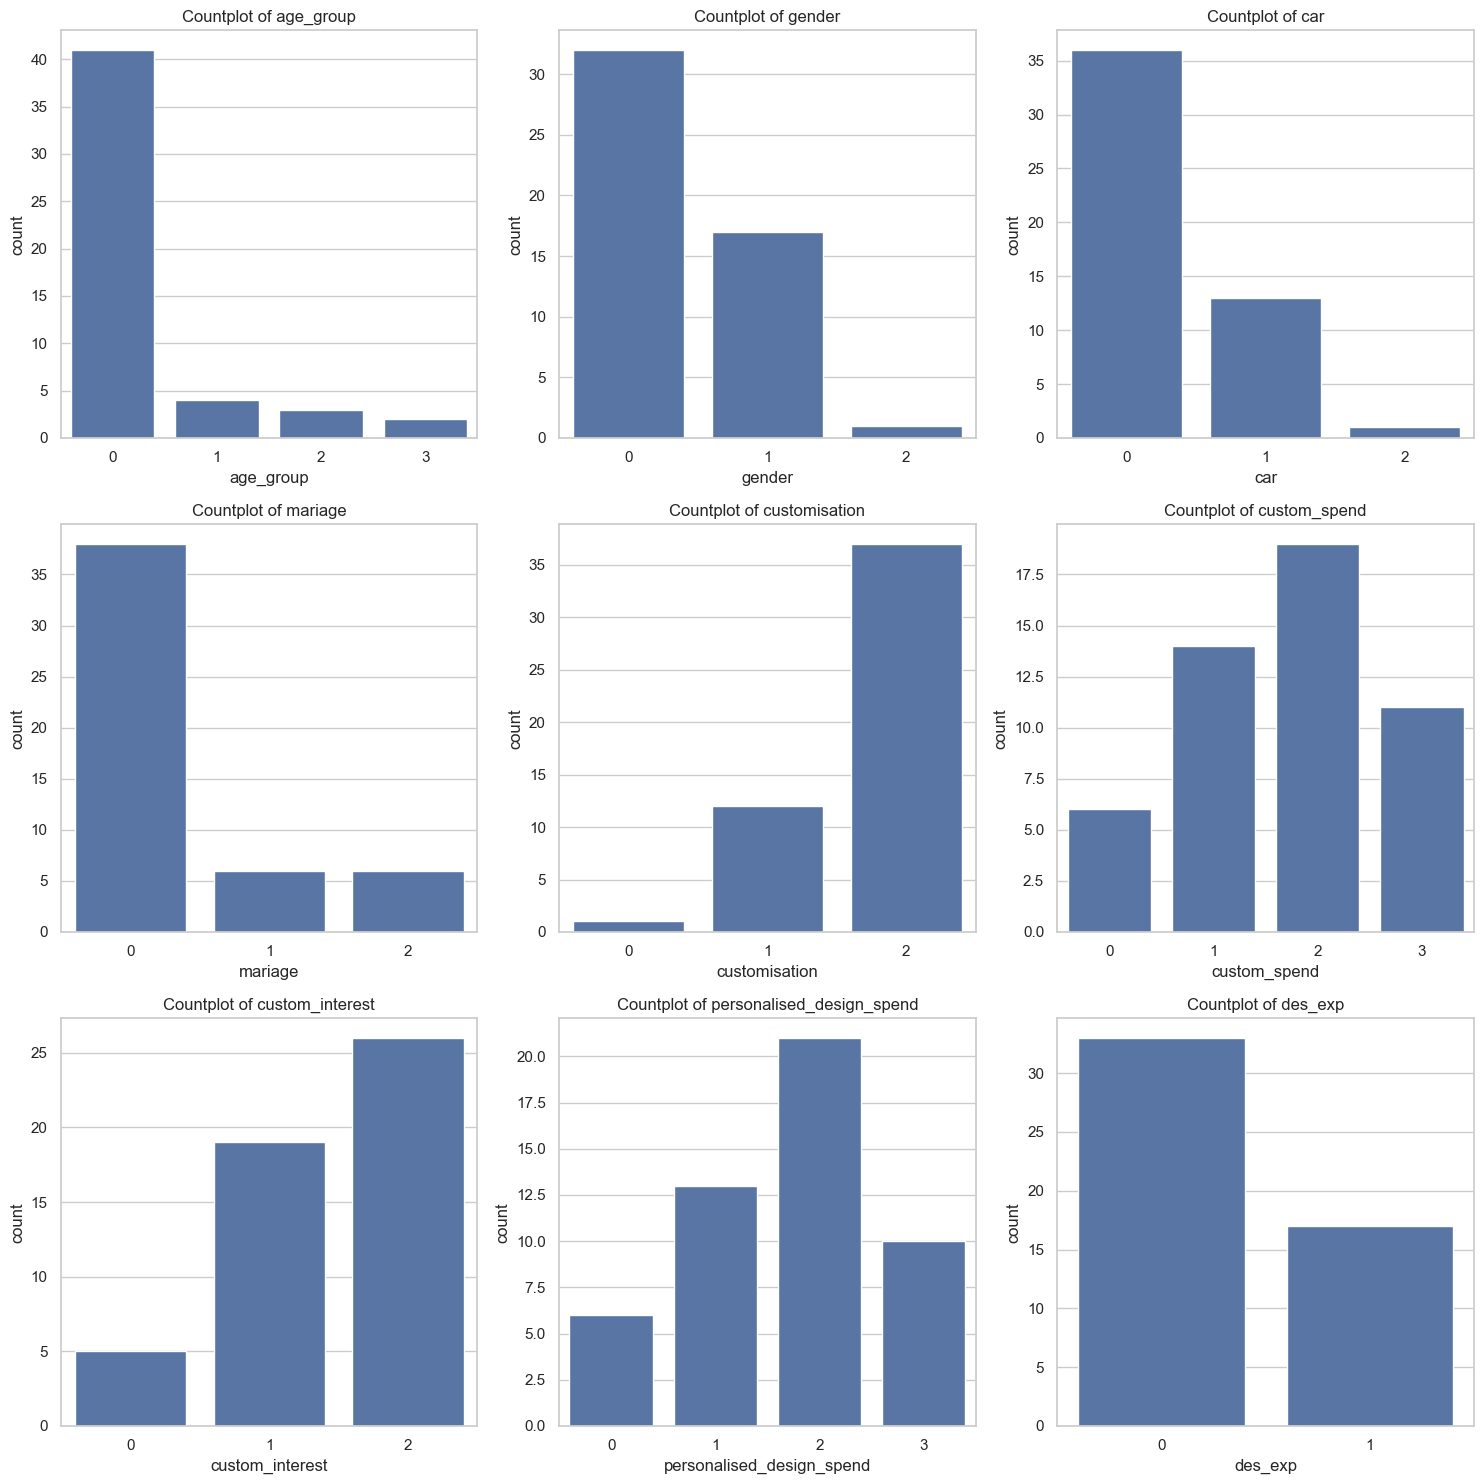

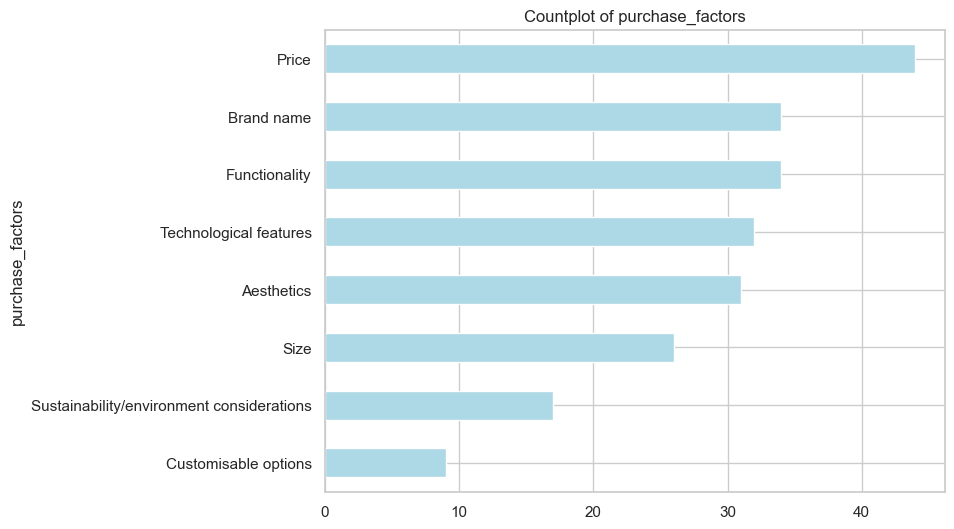

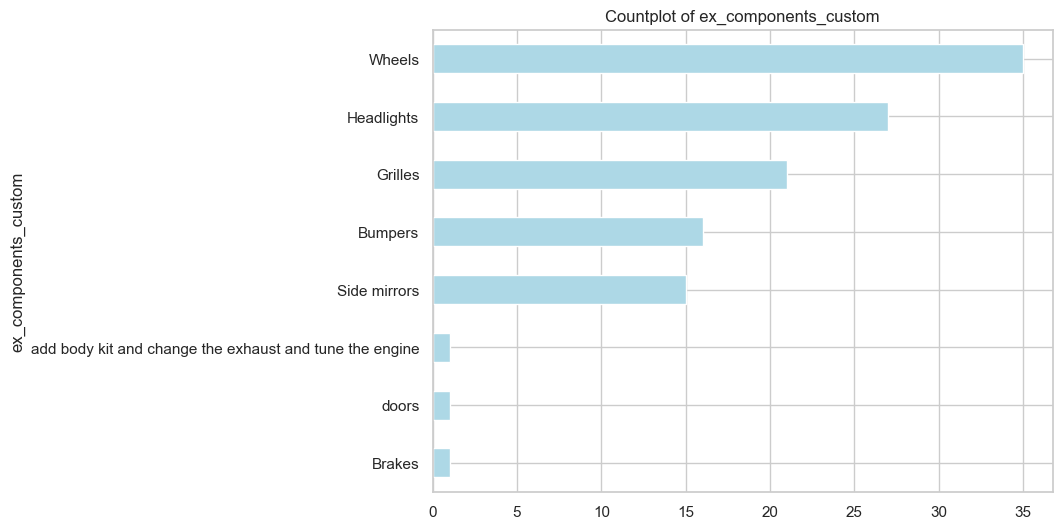

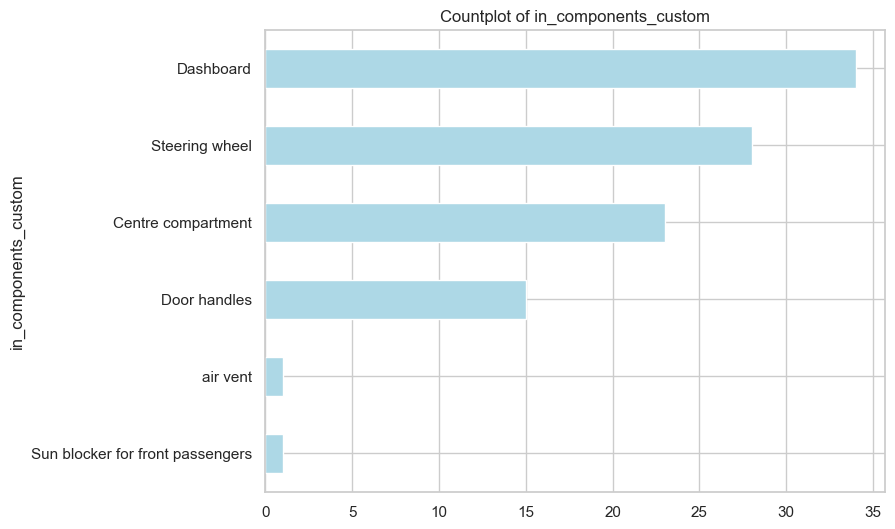

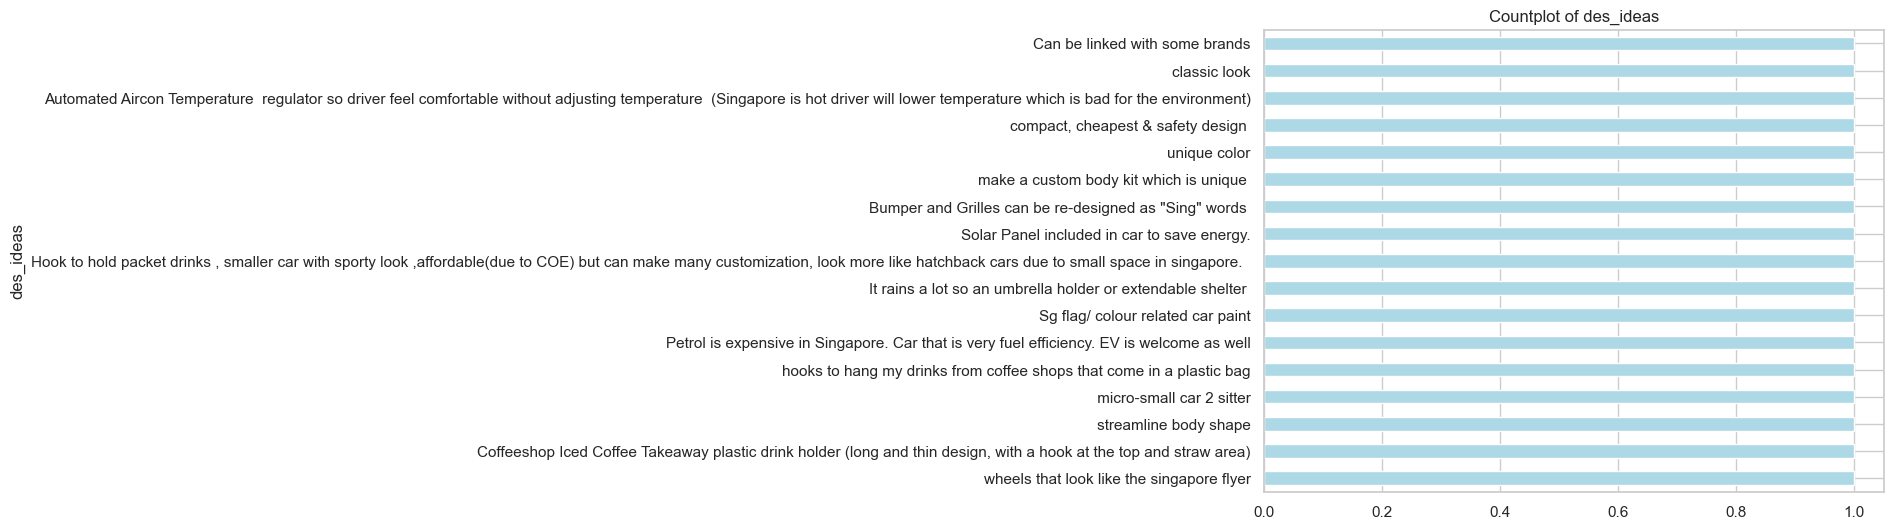

In [15]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a 3x3 grid for the specified columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Columns to include in the grid
grid_columns = ['age_group', 'gender', 'car', 'mariage', 'customisation', 'custom_spend', 'custom_interest', 'personalised_design_spend', 'des_exp']

# Iterate through each column and draw a countplot
for i, col in enumerate(grid_columns):
    sns.countplot(x=col, data=encoded_df, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Create individual plots for the remaining columns
for col in encoded_df.columns:
    if col not in grid_columns:
        plt.figure(figsize=(8, 6))
        encoded_df[col].str.split(';').explode().value_counts().sort_values().plot(kind='barh', color='lightblue')
        plt.title(f'Countplot of {col}')
        plt.show()


In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data_mod_df, x='age_group', hue = 'age_group', order=data_mod_df['age_group'].value_counts().index, palette='viridis')
plt.title('Distribution of Respondents Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(4, 4))
data_mod_df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%',labels=['Male', 'Female', 'Secret'], colors=['red', 'yellow', 'grey'])
plt.title('Gender Distribution of Respondents')
plt.ylabel('')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_mod_df, x='car', hue='car', palette='pastel')
plt.title('Distribution of Car Ownership Status')
plt.xlabel('Car Ownership Status')
plt.ylabel('Count')
tick_labels = ['No, planning to buy', 'Own a car', 'More than 1 car']
plt.xticks(ticks=[0, 1, 2], labels=tick_labels)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_mod_df, x='mariage', hue='mariage', palette='muted')
plt.title('Distribution of Marital Status Among Respondents')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
data_mod_df['purchase_factors'].str.split(';').explode().value_counts().sort_values().plot(kind='barh', color='cyan')
plt.title('Distribution of Factors Influencing Car Purchase')
plt.xlabel('Count')
plt.ylabel('Factors')
plt.show()

In [ ]:
plt.figure(figsize=(4, 4))
data_mod_df['customisation'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'mediumseagreen', 'darkseagreen'])
plt.title('Likelihood of Opting for Customized Vehicle')
plt.ylabel('')
plt.show()


In [ ]:
plt.figure(figsize=(7, 4))
data_mod_df['ex_components_custom'].str.split(';').explode().value_counts().sort_values().plot(kind='barh', color='lightgreen')
plt.title('Distribution of Exterior Components Customization Preferences')
plt.xlabel('Count')
plt.ylabel('Components')
plt.show()


In [ ]:
plt.figure(figsize=(7, 4))
data_mod_df['in_components_custom'].str.split(';').explode().value_counts().sort_values().plot(kind='barh', color='lightblue')
plt.title('Distribution of Interior Components Customization Preferences')
plt.xlabel('Count')
plt.ylabel('Components')
plt.show()

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data_mod_df, x='custom_spend', hue='custom_spend', palette='cividis')
plt.title('Distribution of Budget for Car Customization')
plt.xlabel('Budget Range')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(4, 4))
data_mod_df['custom_interest'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'skyblue', 'darkblue'])
plt.title('Interest in Designing Components')
plt.ylabel('')
plt.show()


In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data_mod_df, x='personalised_design_spend', hue='personalised_design_spend', palette='pastel')
plt.title('Distribution of Willingness to Pay for Personalized Design')
plt.xlabel('Willingness to Pay Range')
plt.ylabel('Count')
plt.show()


In [ ]:
plt.figure(figsize=(4, 4))
data_mod_df['des_exp'].value_counts().plot(kind='pie', autopct='%1.1f%%',labels=['No, need a designer to help', 'I can design on my own'], colors=['orange', 'coral'])
plt.title('3D Design Experience')
plt.ylabel('')
plt.show()


In [ ]:
#print('stop')

In [ ]:
# Check missing values
missing_values = data_mod_df.isnull().sum()
print("Missing Values:\n", missing_values)

# delete rows with missing values 
#data_mod_df.dropna(inplace=True)


In [ ]:
def find_unique_values(df, column_name, delmiter):
    unique_values = []
    for values in df[column_name].unique():
        if values is np.nan:
            continue
        _ = values.split(delmiter)
        for value in _:
            if value not in unique_values:
                unique_values.append(value)
    return unique_values

In [ ]:
purchase_factors_unique = find_unique_values(data_mod_df, "purchase_factors", ";")
for factor in purchase_factors_unique:
  data_mod_df[factor] = data_mod_df["purchase_factors"].str.contains(factor)
purchase_factors_unique
#data_mod_df.head(1)


In [ ]:
exterior_components_unique = find_unique_values(data_mod_df, "ex_components_custom", ";")
for components in exterior_components_unique:
  data_mod_df[components] = data_mod_df["ex_components_custom"].str.contains(components)
#data_mod_df.head(1)
exterior_components_unique


In [ ]:
interior_components_unique = find_unique_values(data_mod_df, "in_components_custom", ";")
for components in interior_components_unique:
  data_mod_df[components] = data_mod_df["in_components_custom"].str.contains(components)
#data_mod_df.head(1)
interior_components_unique


In [ ]:
from fuzzywuzzy import fuzz

# Define a function to calculate fuzzy match score
def fuzzy_match_score(str1, str2):
    return fuzz.ratio(str1, str2)

# Apply fuzzy match score on a column of the dataframe
new_df = data_raw_df.copy()
new_df['Fuzzy Score'] = data_raw_df['How likely are you to opt for customised vehicle if there were no extra charges?'].apply(lambda x: fuzzy_match_score(x, 'Target_String'))
